os - a module in Python that provides functions for interacting with the operating system.

time - a module in Python that provides functions for working with time and date values.

uuid - a module in Python that provides functions for generating universally unique identifiers (UUIDs).

cv2 - a module in Python that provides functions for computer vision tasks, such as image and video processing.

In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [5]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

This code is using the cv2 module to capture video from a device's camera (in this case, the device's default camera indicated by the parameter "0"). It is then looping through a range of numbers (determined by the variable "number_images") and for each iteration, it is printing a message indicating the current image number. It is then using the "cap.read()" function to read a frame of the video and store it in the variable "frame". It is then creating a file name for the image using the "uuid" module to generate a unique identifier and the file extension ".jpg". It is then using the "cv2.imwrite()" function to save the image to the file path specified by the "IMAGES_PATH" variable and the generated file name. It is then showing the image on the screen using the "cv2.imshow()" function and pausing for 0.5 seconds using the "time.sleep()" function. It is then checking if the user has pressed the "q" key on the keyboard, and if so, it is breaking out of the loop. Finally, it is releasing the video capture object and closing all windows using the "cap.release()" and "cv2.destroyAllWindows()" functions.

In [8]:
!labelme

In [9]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

This code is using the TensorFlow (tf) library to retrieve a list of physical devices (i.e. GPUs) available to the system. It is storing the list in the "gpus" variable. It is then looping through each GPU in the list and using the "tf.config.experimental.set_memory_growth()" function to set the memory growth of the GPU to "True". This means that the GPU's memory will be dynamically allocated as needed while running TensorFlow operations, rather than being pre-allocated at the beginning. This can be useful in cases where the GPU may not have enough memory to run all the operations required in a TensorFlow program.

In [11]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [12]:
images.as_numpy_iterator().next()

b'data\\images\\7831a816-8ff3-11ed-8694-d880835064c4.jpg'

In [13]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

This code is defining a function called "load_image" that takes in a parameter "x" (which is expected to be a file path). It is then using the "tf.io.read_file()" function to read the contents of the file at the specified file path and store it in a variable called "byte_img". It is then using the "tf.io.decode_jpeg()" function to decode the contents of "byte_img" (which are expected to be in JPEG format) and store the resulting image in a variable called "img". Finally, it is returning the "img" variable.

In [14]:
images = images.map(load_image)

In [15]:
images.as_numpy_iterator().next()

array([[[142, 141, 136],
        [142, 141, 136],
        [145, 141, 138],
        ...,
        [154, 149, 156],
        [159, 154, 160],
        [163, 158, 164]],

       [[139, 138, 134],
        [140, 139, 135],
        [145, 141, 140],
        ...,
        [153, 151, 156],
        [153, 148, 154],
        [149, 147, 152]],

       [[145, 141, 140],
        [146, 142, 141],
        [147, 143, 144],
        ...,
        [153, 152, 157],
        [153, 151, 156],
        [150, 150, 152]],

       ...,

       [[ 55,  47,  45],
        [ 55,  47,  45],
        [ 55,  47,  45],
        ...,
        [160, 167, 173],
        [160, 167, 175],
        [161, 168, 174]],

       [[ 54,  46,  44],
        [ 54,  46,  44],
        [ 55,  46,  47],
        ...,
        [160, 167, 175],
        [160, 167, 177],
        [160, 167, 175]],

       [[ 54,  46,  44],
        [ 55,  47,  45],
        [ 56,  47,  48],
        ...,
        [158, 165, 175],
        [159, 166, 176],
        [159, 166, 176]]

In [16]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [17]:
image_generator = images.batch(4).as_numpy_iterator()

In [18]:
plot_images = image_generator.next()

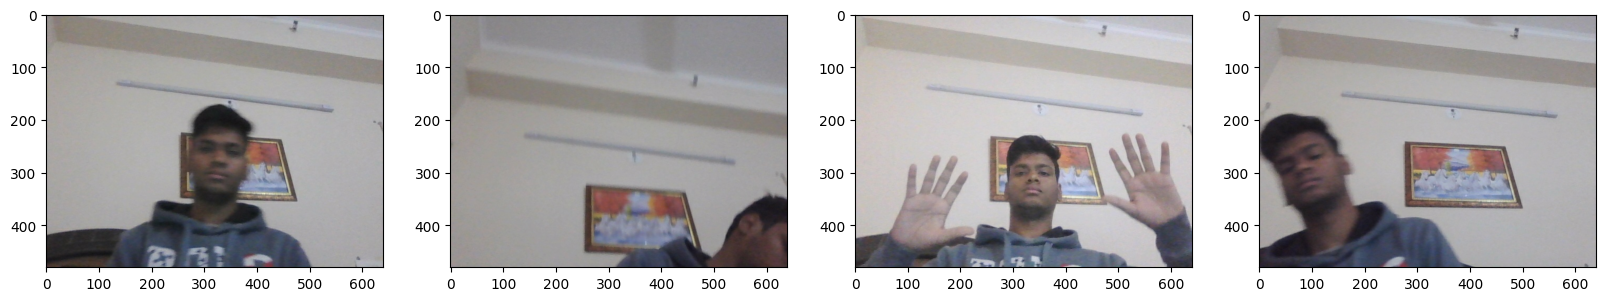

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

This code is using the "plt" module (part of the "matplotlib" library) to create a figure with four subplots arranged in a single column, with a size of 20x20 inches. It is then looping through a list of images (specified by the "plot_images" variable) and for each image, it is displaying it on the corresponding subplot using the "imshow()" function. Finally, it is showing the figure on the screen using the "show()" function.

The images were manually divided into three separate folders called "test", "train", and "val". 

In [22]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

This code is looping through a list of strings ['train', 'test', 'val'], which represents different folders for data. For each iteration of the outer loop, it is then looping through the list of files in a subfolder within the current folder, using the "os.listdir()" function. For each file in this list, it is splitting the file name on the "." character and taking the first element (the part before the "."), and adding the ".json" extension to it. It is then using this modified file name to create a file path for a file with the same name in the "labels" folder. It is then using the "os.path.exists()" function to check if this file already exists in the "labels" folder. If it does, it is creating a new file path for the file in a subfolder within the current folder called "labels". It is then using the "os.replace()" function to move the file from its existing location in the "labels" folder to its new location in the subfolder within the current folder.

In [24]:
import albumentations as alb

In [25]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

This code is creating an object called "augmentor" using the "Compose" function from the "alb" (short for Albumentations) module. The "Compose" function is being passed a list of image transformation functions as its parameter. These functions include:

"RandomCrop" - a function that randomly crops the image to a specific width and height.

"HorizontalFlip" - a function that flips the image horizontally with a probability of 0.5.

"RandomBrightnessContrast" - a function that randomly adjusts the brightness and contrast of the image with a probability of 0.2.

"RandomGamma" - a function that randomly adjusts the gamma value of the image with a probability of 0.2.

"RGBShift" - a function that randomly shifts the RGB values of the image with a probability of 0.2.

"VerticalFlip" - a function that flips the image vertically with a probability of 0.5.

The "Compose" function is also being passed a "bbox_params" parameter, which specifies the format of the bounding boxes (in this case, the format is "albumentations") and the label fields (in this case, the label field is "class_labels"). The "augmentor" object can then be used to apply these image transformations to a set of images.






In [27]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

This code is looping through three different partitions: "train", "test", and "val". For each partition, it is looping through all the images in the "images" subdirectory of the "data" directory for that partition. It is then reading in the image using the "cv2.imread()" function and storing it in the "img" variable. It is then initializing a list of coordinates called "coords" with all values set to 0.00001. It is then creating a file path for the label file for the current image using the "label_path" variable. If the label file exists, it is opening the file and loading the label data using the "json" module. It is then updating the values in the "coords" list with the coordinates from the label data. It is then dividing all the values in the "coords" list by the image size of 640x480.

It is then entering a try block to attempt to perform data augmentation on the image using the "augmentor" function. If any errors occur during this process, they will be caught in the except block and printed. Inside the try block, it is looping through a range of 60 and for each iteration, it is using the "augmentor" function to generate a new version of the image and bounding box coordinates. It is then saving the augmented image to a file in the "aug_data" directory using the "cv2.imwrite()" function. It is then creating a dictionary called "annotation" to store the image name and bounding box information. If the label file exists, it is updating the "annotation" dictionary with the bounding box coordinates and class label. If the label file does not exist, it is setting the bounding box coordinates to [0,0,0,0] and the class label to 0. It is then saving the "annotation" dictionary to a file in the "aug_data" directory using the "json" module.

In [28]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

This code is using the "tf.data.Dataset" module to create a dataset of image files. It is using the "list_files()" function to get a list of all ".jpg" files in the "aug_data\train\images" directory and setting the "shuffle" parameter to "False" to keep the images in the same order as they appear in the directory. It is then using the "map()" function to apply a function (in this case, the "load_image" function) to each element in the dataset. It is then using the "map()" function again to apply a function that resizes each image to a size of 120x120 pixels using the "tf.image.resize()" function. It is then using the "map()" function a third time to apply a function that divides each pixel value by 255, effectively normalizing the pixel values between 0 and 1.

In [29]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [30]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [31]:
train_images.as_numpy_iterator().next()

array([[[0.8329044 , 0.85251224, 0.86672795],
        [0.8331495 , 0.8530637 , 0.8639093 ],
        [0.8300858 , 0.85655636, 0.85949755],
        ...,
        [0.9183211 , 0.921875  , 0.92941177],
        [0.904902  , 0.9254902 , 0.92696077],
        [0.89595586, 0.92941177, 0.9264093 ]],

       [[0.83480394, 0.85588235, 0.87107843],
        [0.8377451 , 0.85882354, 0.87058824],
        [0.8270221 , 0.8583946 , 0.86623776],
        ...,
        [0.9220588 , 0.9142157 , 0.9259804 ],
        [0.9194853 , 0.91764706, 0.9264093 ],
        [0.92126226, 0.92126226, 0.9291054 ]],

       [[0.8292279 , 0.8606005 , 0.8723652 ],
        [0.8278799 , 0.85925245, 0.87101716],
        [0.82395834, 0.8553309 , 0.8670956 ],
        ...,
        [0.9254902 , 0.91764706, 0.92941177],
        [0.9254902 , 0.91764706, 0.92941177],
        [0.9230392 , 0.92009807, 0.92941177]],

       ...,

       [[0.37242648, 0.49056372, 0.58321077],
        [0.41066176, 0.5194853 , 0.6071078 ],
        [0.49264705, 0

In [32]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

This code defines a function called "load_labels()" which takes in a single parameter, "label_path". Inside the function, it opens the file specified by "label_path" in read mode and stores the file object in the variable "f". It then uses the "json" module to load the contents of the file into a Python dictionary and store it in the variable "label". It returns a list containing the value for the "class" key in the dictionary and the value for the "bbox" key in the dictionary.

In [ ]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

This code is using the TensorFlow (tf) module to create a dataset of file paths for label files located in the "aug_data\train\labels" directory and ending with the ".json" file extension. The "shuffle" parameter is set to "False", so the file paths will not be shuffled. The dataset is then mapped to a function called "load_labels" using the "map()" function. The "lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16])" lambda function is defining the function that will be applied to each element in the dataset. The "load_labels" function takes a single parameter (the file path) and returns two values: a "tf.uint8" type and a "tf.float16" type. The "tf.py_function()" function is used to wrap the "load_labels" function so that it can be used with TensorFlow's dataset API.

In [34]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [35]:

val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [36]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.10425, 0.194  , 0.584  , 0.78   ], dtype=float16))

In [37]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [38]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

This code is using the "tf.data" module from the TensorFlow library to create a dataset object from two existing datasets, "train_images" and "train_labels". It is then shuffling the elements in the dataset using the "shuffle()" function and specifying a buffer size of 5000. It is then grouping the elements into batches of size 8 using the "batch()" function. Finally, it is prefetching 4 batches at a time using the "prefetch()" function, which can help improve the performance of the model by allowing it to load and process the next batch of data while the current batch is being processed. This is useful for training models on large datasets where the time to load and process each batch can become a bottleneck.

The buffer size in the "shuffle()" function determines the number of elements to buffer in memory while shuffling the dataset. In general, a larger buffer size will result in a more evenly shuffled dataset, but it may also increase the time and memory required to shuffle the dataset.

In [39]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [40]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [41]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.2717, 0.4153, 0.602 , 0.8345],
        [0.3342, 0.2196, 0.7754, 0.729 ],
        [0.2017, 0.2274, 0.5894, 0.6675],
        [0.    , 0.4521, 0.1252, 0.959 ],
        [0.    , 0.1213, 0.3408, 0.66  ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.334 , 0.3887, 0.7935, 0.9517]], dtype=float16))

In [42]:
data_samples = train.as_numpy_iterator()

In [45]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


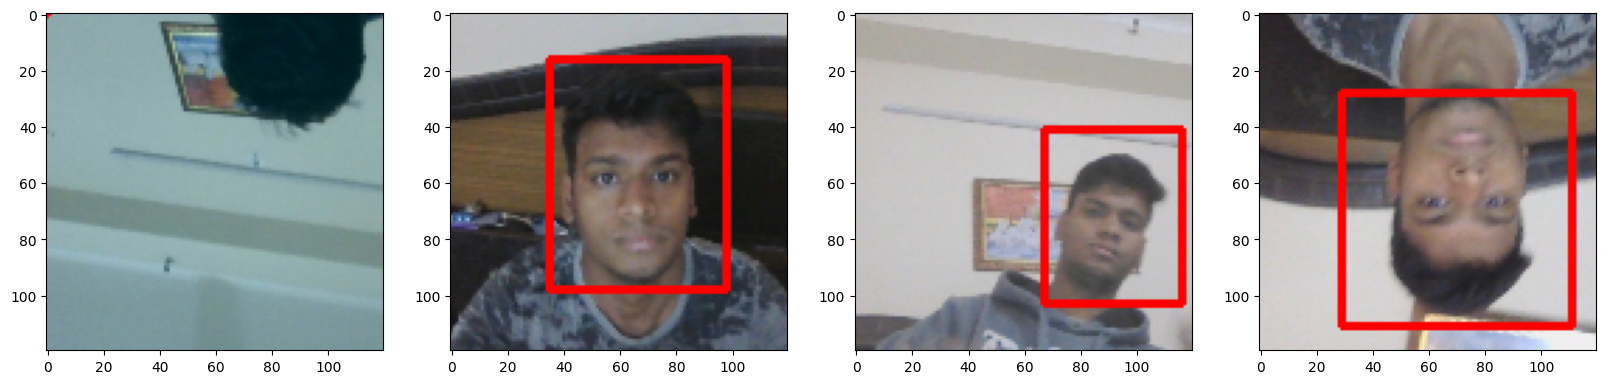

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [48]:
vgg = VGG16(include_top=False)

This code is creating an instance of the VGG16 model from the Keras library, with the "include_top" parameter set to "False". The VGG16 model is a pre-trained convolutional neural network (CNN) that was developed by the Visual Geometry Group at the University of Oxford. It was trained on the ImageNet dataset, which consists of over 1 million images and 1000 classes. The "include_top" parameter determines whether or not to include the fully-connected layers at the top of the model. If set to "False", the model will not include the fully-connected layers and will only include the convolutional and pooling layers. This can be useful for transfer learning, where the fully-connected layers are replaced with new layers that are trained on a different dataset.

In [49]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [51]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

This code defines a function called "build_model" which builds a model for face tracking. It starts by creating an input layer with shape (120,120,3), which indicates that the model will accept images with a height and width of 120 pixels and 3 color channels (RGB). It then uses the "VGG16" function from the VGG16 module (imported in a previous line of code) to create a convolutional neural network with the input layer as its input and sets the "include_top" parameter to "False" to exclude the final classification layers from the VGG16 model. It then applies global max pooling to the output of the VGG16 model and creates two dense layers with 2048 and 1 neurons, respectively, and sets the activation function for both layers to "relu". These layers form the classification model, which predicts whether or not there is a face present in the image. It then applies global max pooling to the output of the VGG16 model again and creates two more dense layers with 2048 and 4 neurons, respectively, and sets the activation function for both layers to "sigmoid". These layers form the bounding box model, which predicts the location of the face in the image. Finally, it creates a Model object with the input layer as its input and the classification and bounding box models as its outputs and returns it.

In [52]:
facetracker = build_model()

In [53]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [54]:
X, y = train.as_numpy_iterator().next()

In [55]:
X.shape

(8, 120, 120, 3)

In [56]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 6s 6s/step


In [57]:
classes, coords

(array([[0.46412787],
        [0.48907667],
        [0.4622025 ],
        [0.514185  ],
        [0.42318848],
        [0.3945278 ],
        [0.42176935],
        [0.426013  ]], dtype=float32),
 array([[0.44957107, 0.4204896 , 0.58232033, 0.48971298],
        [0.3834788 , 0.33763865, 0.5439408 , 0.5106795 ],
        [0.39297906, 0.37438136, 0.5272049 , 0.47055602],
        [0.48348734, 0.3593212 , 0.49719226, 0.45558894],
        [0.432618  , 0.40898624, 0.561456  , 0.50917464],
        [0.41806424, 0.3377169 , 0.5627611 , 0.5274572 ],
        [0.48553053, 0.29496133, 0.5746131 , 0.48344722],
        [0.40282488, 0.40822184, 0.44595784, 0.55069935]], dtype=float32))

In [58]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

This code is calculating the decay rate for the learning rate of a neural network model during training. The "batches_per_epoch" variable is being set to the length of the "train" dataset. The "lr_decay" variable is then being set to the decay rate calculated as the inverse of the desired final learning rate (0.75) minus 1, divided by the number of batches per epoch. This decay rate is typically used to gradually decrease the learning rate over the course of training in order to improve the model's performance and prevent overfitting.

In [59]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [60]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

This code defines a function called "localization_loss" that takes in two arguments: "y_true" and "yhat". These arguments are expected to be tensors with shape (batch_size, 4), where each element in the second dimension represents a coordinate (x1, y1, x2, y2) of a bounding box in an image.

The function first calculates the "delta_coord" variable by summing the squares of the differences between the x and y coordinates of the bounding boxes in "y_true" and "yhat". It then calculates the true and predicted heights and widths of the bounding boxes using the y1 and y2 coordinates for the height and the x1 and x2 coordinates for the width. It then calculates the "delta_size" variable by summing the squares of the differences between the true and predicted heights and widths. Finally, the function returns the sum of "delta_coord" and "delta_size" as the localization loss. This loss can be used to train a model to predict bounding boxes that are accurate in both their coordinates and sizes.

In [61]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [65]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

This code defines a class called "FaceTracker" which is a subclass of the "Model" class from the TensorFlow library. The "FaceTracker" class has a constructor method that takes an "eyetracker" parameter and any additional keyword arguments (**kwargs) and initializes the parent class using the super() function. The "FaceTracker" class also has a "compile" method that takes in an "opt" parameter, a "classloss" parameter, and a "localizationloss" parameter, as well as any additional keyword arguments (**kwargs) and initializes the parent class using the super() function. It also stores the "classloss" and "localizationloss" parameters as class variables and the "opt" parameter as an instance variable. The "FaceTracker" class also has a "train_step" method that takes in a "batch" parameter and any additional keyword arguments (**kwargs). This method unpack the "batch" parameter into "X" and "y" variables, then uses a TensorFlow "GradientTape" context manager to compute the gradient of a total loss value with respect to the model's trainable variables. The total loss is calculated by adding the "batch_localizationloss" (calculated using the "self.lloss" class variable and the "coords" output of the model) and half of the "batch_classloss" (calculated using the "self.closs" class variable and the "classes" output of the model). The gradients are then applied to the model's trainable variables using the "apply_gradients" method of the "self.opt" instance variable. The "train_step" method then returns a dictionary containing the total loss, class loss, and regression loss values. The "FaceTracker" class also has a "test_step" method that takes in a "batch" parameter and any additional keyword arguments (**kwargs). This method is similar to the "train_step" method, but it does not use a "GradientTape" context manager and instead calculates the loss values using the model's output during inference (i.e. with "training=False"). The "FaceTracker" class also has a "call" method that takes in an "X" parameter and any additional keyword arguments (**kwargs) and returns the output of the model when applied to the "X" input.

In [66]:
model = FaceTracker(facetracker)

In [67]:
model.compile(opt, classloss, regressloss)

In [68]:
logdir='logs'

In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

This code creates a TensorBoard callback object in TensorFlow's "keras" module. The TensorBoard callback is a class that allows you to visualize the progress of your model training and evaluation using TensorBoard, a web-based tool for analyzing TensorFlow runs. The TensorBoard callback is initialized with the "logdir" parameter, which specifies the directory where the TensorBoard log files will be saved. The TensorBoard callback can then be passed as an argument to the "fit" or "evaluate" methods of a TensorFlow model, and it will automatically log the training and evaluation metrics to the specified log directory for visualization in TensorBoard.

In [70]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
473/473 [==============================] - 47s 82ms/step - total_loss: 0.4282 - class_loss: 0.1166 - regress_loss: 0.3699 - val_total_loss: 0.6810 - val_class_loss: 0.4757 - val_regress_loss: 0.4432
Epoch 2/50
473/473 [==============================] - 38s 74ms/step - total_loss: 0.1397 - class_loss: 0.0380 - regress_loss: 0.1207 - val_total_loss: 0.1205 - val_class_loss: 0.0505 - val_regress_loss: 0.0953
Epoch 3/50
473/473 [==============================] - 38s 74ms/step - total_loss: 0.1222 - class_loss: 0.0384 - regress_loss: 0.1030 - val_total_loss: 0.4854 - val_class_loss: 0.4382 - val_regress_loss: 0.2663
Epoch 4/50
473/473 [==============================] - 38s 74ms/step - total_loss: 0.0545 - class_loss: 0.0157 - regress_loss: 0.0466 - val_total_loss: 0.0756 - val_class_loss: 0.0320 - val_regress_loss: 0.0595
Epoch 5/50
473/473 [==============================] - 38s 74ms/step - total_loss: 0.0475 - class_loss: 0.0134 - regress_loss: 0.0408 - val_total_loss: 0.4605 - 

In [71]:
hist.history

{'total_loss': [0.05322762206196785,
  0.030734386295080185,
  0.05061879754066467,
  0.07347919046878815,
  0.007759071886539459,
  0.02062482200562954,
  0.14417701959609985,
  0.0070373015478253365,
  0.0014225725317373872,
  0.014294466003775597,
  0.0028749071061611176,
  0.0051581659354269505,
  0.0008168623899109662,
  0.0018421488348394632,
  0.0015105836791917682,
  0.001052442821674049,
  0.0023933446500450373,
  0.00271414197050035,
  0.001063255243934691,
  0.0005338474293239415,
  0.001288144034333527,
  0.000829029711894691,
  0.0009572304552420974,
  0.0011820727959275246,
  0.0005493393982760608,
  0.0006285199779085815,
  0.00034335063537582755,
  3.5527796171663795e-06,
  0.000741540570743382,
  0.0001976074418053031,
  0.0004660517442971468,
  0.00015294727927539498,
  0.0008403300889767706,
  0.0015586899826303124,
  9.742248948896304e-05,
  0.00024994497653096914,
  0.00026370337582193315,
  0.0002551329671405256,
  0.00020175766258034855,
  0.00012572512787301093,

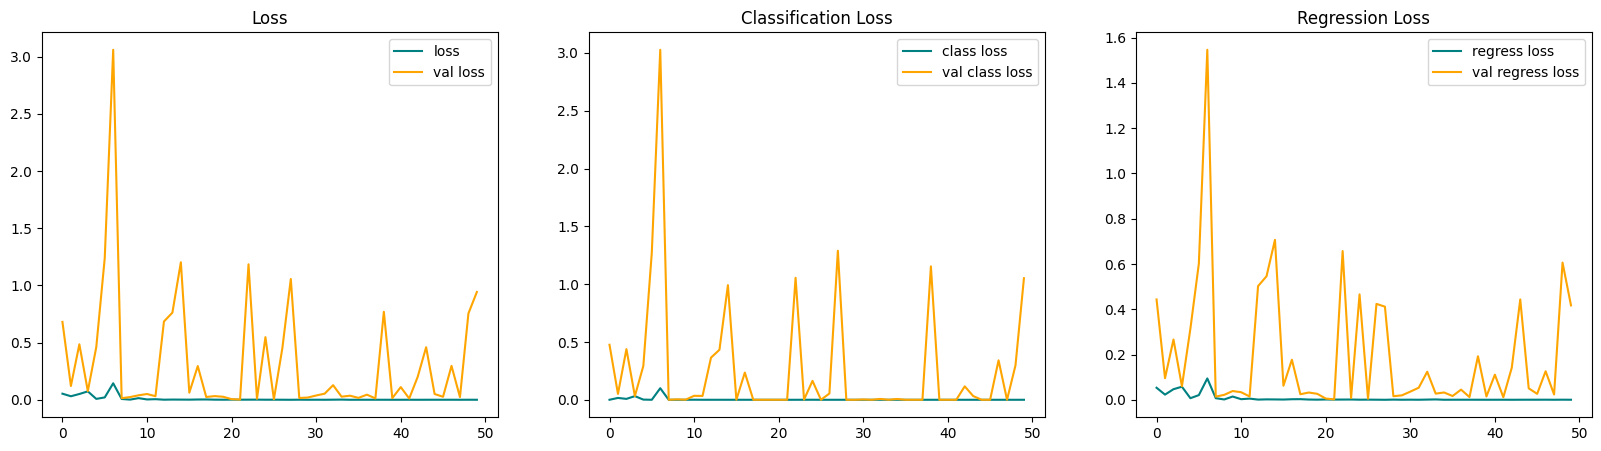

In [72]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

This code is using the matplotlib library's "subplots" function to create a figure with 3 subplots arranged in a single column, and storing the figure and axis objects in the variables "fig" and "ax", respectively. It is then using the "plot" method of the first subplot's axis object to plot the values in the "total_loss" key of the "hist" object's "history" attribute against the x-axis, using the color "teal" and with the label "loss". It is then using the "plot" method again to plot the values in the "val_total_loss" key of the "hist" object's "history" attribute against the x-axis, using the color "orange" and with the label "val loss". It is then using the "set_text" method of the "title" attribute of the first subplot's axis object to set the title to "Loss". It is then using the "legend" method of the first subplot's axis object to display the legend. It is then doing similar operations for the second and third subplots, plotting the values in the "class_loss" and "val_class_loss" keys for the second subplot and the values in the "regress_loss" and "val_regress_loss" keys for the third subplot. Finally, it is using the "show" function of the "plt" object to display the figure. This code is likely intended to visualize the loss values during the training and validation phases of a machine learning model.

In [73]:
test_data = test.as_numpy_iterator()

In [74]:
test_sample = test_data.next()

In [75]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 19ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


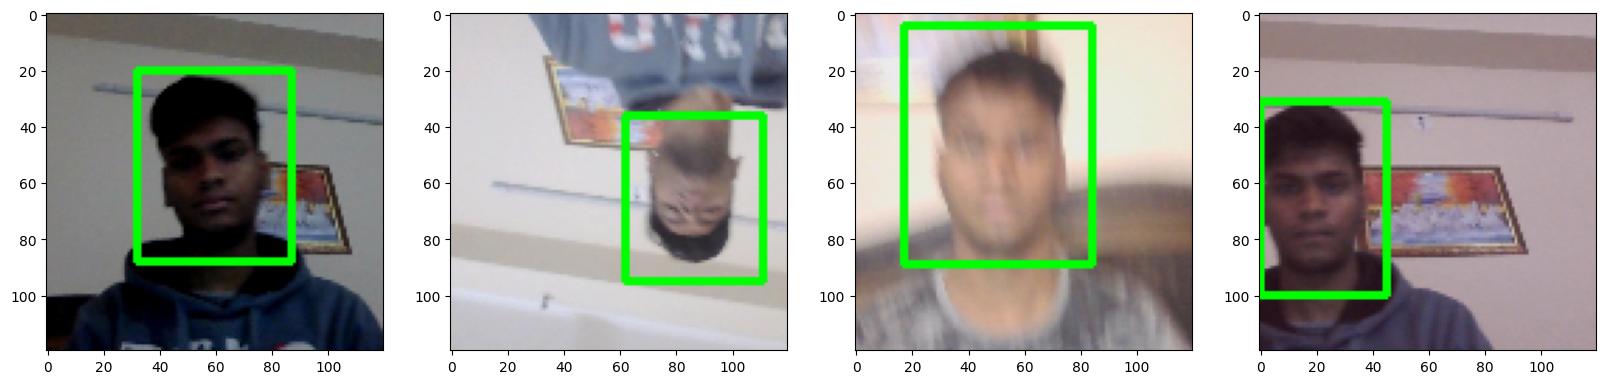

In [77]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (0,255,0), 2)
    
    ax[idx].imshow(sample_image)

In [78]:
from tensorflow.keras.models import load_model

In [79]:
facetracker.save('rishbah_model.h5')

This code is using the "save" method of the "facetracker" object to save the object's model to a file with the name "rishbah_model.h5". The "save" method is a method of the "Model" class from the TensorFlow library and it allows you to save the model's architecture, weights, and training configuration in a single file. This can be useful for storing the model for later use or for sharing the model with others. The file extension ".h5" indicates that the model is being saved in the HDF5 format, which is a hierarchical data format that is commonly used for storing large amounts of numerical data.

In [80]:
facetracker = load_model('rishbah_model.h5')

In [82]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 15ms/step


KeyboardInterrupt: 

This code uses the cv2 module to capture video from a device's camera (in this case, the device's default camera indicated by the parameter "0"). It then enters a while loop that continues as long as the video capture object is opened. Inside the while loop, it reads a frame of the video and stores it in the "frame" variable. It then selects a region of the frame by slicing it using the indices 50 to 500 for both the rows and columns. It then converts the frame from the BGR color space to the RGB color space using the "cv2.cvtColor" function and stores the result in the "rgb" variable. It then resizes the image using the TensorFlow "tf.image.resize" function and stores the result in the "resized" variable. It then uses the "facetracker" object to predict the class and coordinates of a face in the image and stores the result in the "yhat" variable. It then retrieves the coordinates from the "yhat" variable and stores them in the "sample_coords" variable. If the predicted class is greater than 0.5, it uses the cv2 "rectangle" function to draw a blue rectangle around the region of the image containing the face and a blue label above it indicating that it is a face. It then uses the cv2 "putText" function to write the text "face" in white within the label. It then shows the modified frame on the screen using the "cv2.imshow" function and checks if the user has pressed the "q" key on the keyboard. If the "q" key is pressed, it breaks out of the while loop. Finally, it releases the video capture object and closes all windows using the "cap.release" and "cv2.destroyAllWindows" functions.